# 오늘 스터디에서 배운 것

## PART I. 머신러닝
### DecisionTree는 어떤 데이터에 적합한가? DecisionTree를 쓰는 이유는 무엇인가?
범주형 데이터를 예측하는데 적합하다. (예) 타이타닉 생존률 예측(생존 or not), iris 꽃의 종류(Setosa, Versicolor, Virginica)   

오늘 수업에서 캘리포니아 집값 예측 데이터에서 `total_rooms`와 `total_bedrooms`의 값 기준으로 `rooms_level`과 `bedrooms_level`에 `1`~`4`으로 분류를 시켰다. 이 때, 숫자형으로 분류명을 지으면 우리가 `astype`을 통해 데이터 타입을 바꾸어 주었음에도 불구하고 머신러닝 모델에서 이 값을 수치형으로 인식할 수 있다. 즉 연산과 대소 비교가 가능한 데이터로 인식할 수 있다. 그렇게 되면 머신러닝 모델이 데이터의 값이 큰 분류(예.카테고리`rooms_level=4`)에 가중치를 주는 방식으로 특정 데이터들에 중요도를 매길 수 있다. 카테고리형 데이터에 맞지 않은 모델이 된다.  

그래서 `dummy`라는 데이터 타입을 사용한다. 카테고리를 세분화시킨 형태로 데이터 값을 이진코드(binary) 형식으로 저장한다. 예를 들어서 우리가 `room_level`을 `1`~`4`로 나누는데 `0`과 `1` 값만을 가질 수 있는 bit를 만들고 각 레벨에 해당하는 범주형에 대해서만 `1`값을 부여한다. 


| category | bit 1 | bit 2 | bit 3 | bit 4 |True or False|
|---|---|---|---|---|---|
|category1|1|0|0|0|→ [True, False, False, False]|
|category2|0|1|0|0|→ [False, True, False, False]|
|category3|0|0|1|0|→ [False, False, True, False]|
|category4|0|0|0|1|→ [False, False, False, True]|

각 데이터가 가진 4개의 bit을 통해서 알맞은 카테고리로 분류할 수 있고, 카테고리가 가진 값이 `True` or `False`이기 때문에 카테고리 값에 따른 수치 계산이나 대소 비교가 불가능하게 된다.   

| data | bit 1 | bit 2 | bit 3 | bit 4 |category|
|---|---|---|---|---|---|
|data1|1|0|0|0|→ category1|
|data2|0|1|0|0|→ category2|
|data3|0|0|1|0|→ category3|
|data4|0|0|0|1|→ category4|

분류 모델에는 DecisionTree 이 외에 Linear Regression이 있다.

### Linear Regression 은 무엇인가?
분류형 데이터가 아닌 연속적인 데이터 값을 가지는 이산형 데이터의 경우에 Linear Regression을 사용한다. (예) 캘리포니아의 집값 데이터   

캘리포니아 집값 데이터를 살펴보면, 집값을 결정하는 요소는 columns가 될 수 있다. 방의 갯수, 침실의 갯수, 인구수, 수입 중앙값 등.   
이 중에 어떤 컬럼은 예측의 정확도를 떨어트릴 수 있다.

In [2]:
import pandas as pd
test = pd.read_csv("california_housing_test.csv")
train = pd.read_csv("california_housing_train.csv")

train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:
train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

이 요소들 중에 집값과의 상관관계가 상대적으로 높은 정보가 있을 수 있고, 낮은 정보가 있을 수 있다.  
집값의 예측 모델을 집값에 영향을 미치는 요소(feature)와 그 가중치(weight)의 합으로 생각한다면 상관관계가 높을수록 가중치의 값이 클 것이다.  

$$y(model)=w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}... +w_{n}x_{n} (n-dimension)$$

$$x_{i} : features, w_{i}: weight$$
 
Linear Regression은 feature의 갯수에 따라 n차원 계산이 들어가기 때문에 Desicion Tree 보다 더 정교한 예측이 가능하다. 

### 이산형 데이터를 카테고리화 시킬 때 왜 train set과 test set를 동일한 기준으로 분류해야하는가?
train set과 test set을 다른 기준으로 카테고리화 시키면 모델에서 과적합(overfitting)이 발생하기 때문이다.   

오늘 수업에서 데이터를 `room_level`과 `bedroom_level`로 분류할 때 train set의 4분위수(25%, 50%, 75%)를 기준으로 레벨을 나누었다. test set의 경우 train set과 다른 값을 가지는 데이터 셋이기 때문에 train set과 다른 4분위수를 가지는데 왜 train set을 기준으로 분류 기준을 맞추어야 하는가하는 질문이 나왔다.

test set의 목적은 모델의 성능을 평가하는 용도이며 정답 데이터가 있다. train set으로 훈련시킨 모델이 예측한 결과와 정답 데이터를 비교하여 어느 정도 맞추었는지를 정확도 지표로 사용하게 된다. 

만약 train set과 test set을 서로 다른 기준으로 분류하게 되면 우리가 만든 모델이 test set만 잘 맞추고 이외에 외부로부터 가져온 데이터 셋에 대해서는 낮은 정확도를 보이게 된다. 즉 과적합이란 "학습을 과하게 시켜 학습 데이터에선 최적의 결과를 내지만 새로운 데이터에 대해선 판단력이 부정확해지는 문제"를 말한다. [링크](https://itwiki.kr/w/%EA%B3%BC%EC%A0%81%ED%95%A9_%EB%AC%B8%EC%A0%9C)


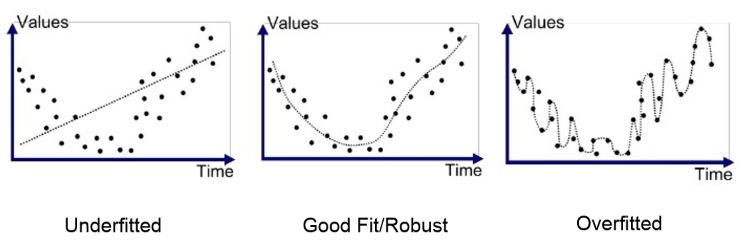


> "테스트 데이터를 오염시킨다."

> "테스트 데이터를 모델에 여러번 넣게 되면 또 과적합이 된다." ???ㅅㅂ?

*실제로 테스트 데이터는 건들이지 않는 것이 좋다고 한다...* 

## PART II. axis 개념 알고가기

핵심 아이디어 : "여러 값을 더한다는 것은 차원을 축소시키는 것"

### sum(axis=0 : 행의 차원 축소, axis =1 : 열의 차원 축소)
#### 2차원

In [12]:
import numpy as np

In [9]:
samp = np.array([[1,2,3],[4,5,6]])
print(samp.shape)
samp

(2, 3)


array([[1, 2, 3],
       [4, 5, 6]])

In [10]:
np.sum(samp, axis=0) # 행의 차원 축소 2→1

array([5, 7, 9])

In [11]:
np.sum(samp, axis=1) # 열의 차원 축소 3→1

array([ 6, 15])

#### 3차원 [링크](http://machinelearningkorea.com/2019/05/18/%ED%8C%8C%EC%9D%B4%EC%8D%AC-axis-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-%EC%B9%98%ED%8A%B8%EC%BD%94%EB%93%9C/)

좌표평면 상에서 __행__ X __열__ 만큼의 데이터가 __폭__ 만큼 쌓여있다고 생각하자. 세가지의 데이터 방향이 있다. axis=0, 1, 2     
np.sum에서 axis = 0(폭),1(행),2(열)은 각각 3,2,4 데이터를 합쳐준다.

In [14]:
samp = np.random.randint(10, size=(3,2,4))
print(samp.shape)
samp

(3, 2, 4)


array([[[5, 5, 4, 4],
        [2, 2, 6, 4]],

       [[2, 7, 2, 8],
        [1, 5, 9, 3]],

       [[5, 7, 2, 4],
        [0, 7, 5, 7]]])

In [16]:
print(np.sum(samp, axis=0).shape)
np.sum(samp, axis=0) # axis=0 폭 방향 차원 축소

(2, 4)


array([[12, 19,  8, 16],
       [ 3, 14, 20, 14]])

In [17]:
print(np.sum(samp, axis=1).shape)
np.sum(samp, axis=1) # axis=1 행 방향 차원 축소

(3, 4)


array([[ 7,  7, 10,  8],
       [ 3, 12, 11, 11],
       [ 5, 14,  7, 11]])

In [18]:
print(np.sum(samp, axis=2).shape)
np.sum(samp, axis=2) # axis=2 열 방향 차원 축소

(3, 2)


array([[18, 14],
       [19, 18],
       [18, 19]])